In [1]:
import yfinance as yf
import trader
import numpy as np

In [5]:
import os
import pandas as pd

path_data = "./Baseline Pairs/"
file_names = os.listdir(path_data)
# if you want to run a subset, then overwirte the file_names list
# file_names = [... , ..., ...]

# specifiy the output folder
path_result = "./Results 0225 PCA Pairs/"

graph_output = False

print(file_names)



['FENY_VDE_2020.csv', 'FUTY_VPU_2017.csv', 'IVW_VOOG_2019.csv', 'SPYG_VOOG_2021.csv', 'SPYG_VOOG_2022.csv', 'VEU_VXUS_2018.csv']


In [6]:
# file_names = ["BRZU_DUST_2022.csv",]
file_names = ["SPYG_VOOG_2022.csv",]

In [4]:
ret_summary = {}

for file_name in file_names:
    print("-------------------------------------------------")
    print("running", file_name)
    x,y,year = file_name[:-4].split("_")
    print(year,type(year))
    prices = yf.download([x,y],start=year+"-01-01",end=year+"-12-31")["Adj Close"]

    df_signals = pd.read_csv(path_data+file_name, index_col=0)
    df_signals.index = prices.index

    for threshold in df_signals.columns:
        print("...", threshold)
        df_return = trader.calculate_return(prices,0,df_signals[threshold],"mispricing_method")
        if graph_output:
            fig_name = file_name[:-4]+" "+threshold
            f, _ = trader.plot_summary(df_return, fig_name)
            f.savefig(path_result+fig_name+".png")

        ret_summary[file_name+" "+threshold] = trader.get_summary_mispricing(df_return, [x,y],"","","")

# money_ret_summary = pd.DataFrame.from_dict(ret_summary, orient='index')
# money_ret_summary.columns = df_signals.columns
money_ret_summary = pd.DataFrame.from_dict(ret_summary, orient='index')
money_ret_summary.to_excel(path_result+"result_summary_2022_0227_PCA.xlsx")



print("DONE")

-------------------------------------------------
running SPYG_VOOG_2022.csv
2022 <class 'str'>
[*********************100%***********************]  2 of 2 completed
... D = 0.3


RuntimeError: latex was not able to process the following string:
b'P&L, Realized P&L, Unrealized P&L'

Here is the full report generated by latex:
This is pdfTeX, Version 3.141592653-2.6-1.40.24 (MiKTeX 23.1) (preloaded format=latex.fmt)
 restricted \write18 enabled.
entering extended mode
(../ad0fed42f9e1955986e45e0722282f48.tex
LaTeX2e <2022-11-01> patch level 1
L3 programming layer <2023-02-07>
(C:\Users\Surface\AppData\Local\Programs\MiKTeX\tex/latex/base\article.cls
Document Class: article 2022/07/02 v1.4n Standard LaTeX document class
(C:\Users\Surface\AppData\Local\Programs\MiKTeX\tex/latex/base\size10.clo))
(C:\Users\Surface\AppData\Local\Programs\MiKTeX\tex/latex/type1cm\type1cm.sty)
(C:\Users\Surface\AppData\Local\Programs\MiKTeX\tex/latex/cm-super\type1ec.sty
(C:\Users\Surface\AppData\Local\Programs\MiKTeX\tex/latex/base\t1cmr.fd))
(C:\Users\Surface\AppData\Local\Programs\MiKTeX\tex/latex/base\inputenc.sty)
(C:\Users\Surface\AppData\Local\Programs\MiKTeX\tex/latex/geometry\geometry.sty
(C:\Users\Surface\AppData\Local\Programs\MiKTeX\tex/latex/graphics\keyval.sty)
(C:\Users\Surface\AppData\Local\Programs\MiKTeX\tex/generic/iftex\ifvtex.sty
(C:\Users\Surface\AppData\Local\Programs\MiKTeX\tex/generic/iftex\iftex.sty))
(C:\Users\Surface\AppData\Local\Programs\MiKTeX\tex/latex/geometry\geometry.cfg
))
(C:\Users\Surface\AppData\Local\Programs\MiKTeX\tex/latex/amsmath\amsmath.sty
For additional information on amsmath, use the `?' option.
(C:\Users\Surface\AppData\Local\Programs\MiKTeX\tex/latex/amsmath\amstext.sty
(C:\Users\Surface\AppData\Local\Programs\MiKTeX\tex/latex/amsmath\amsgen.sty))
(C:\Users\Surface\AppData\Local\Programs\MiKTeX\tex/latex/amsmath\amsbsy.sty)
(C:\Users\Surface\AppData\Local\Programs\MiKTeX\tex/latex/amsmath\amsopn.sty))
(C:\Users\Surface\AppData\Local\Programs\MiKTeX\tex/latex/amsfonts\amssymb.sty
(C:\Users\Surface\AppData\Local\Programs\MiKTeX\tex/latex/amsfonts\amsfonts.sty
))
(C:\Users\Surface\AppData\Local\Programs\MiKTeX\tex/latex/underscore\underscore
.sty)
(C:\Users\Surface\AppData\Local\Programs\MiKTeX\tex/latex/base\textcomp.sty)
(C:\Users\Surface\AppData\Local\Programs\MiKTeX\tex/latex/l3backend\l3backend-d
vips.def)
No file ad0fed42f9e1955986e45e0722282f48.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Misplaced alignment tab character &.
l.18 {\rmfamily P&
                  L, Realized P&L, Unrealized P&L}
No pages of output.
Transcript written on ad0fed42f9e1955986e45e0722282f48.log.




Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x0000019A96BAF9A0> (for post_execute):


RuntimeError: latex was not able to process the following string:
b'P&L, Realized P&L, Unrealized P&L'

Here is the full report generated by latex:
This is pdfTeX, Version 3.141592653-2.6-1.40.24 (MiKTeX 23.1) (preloaded format=latex.fmt)
 restricted \write18 enabled.
entering extended mode
(../ad0fed42f9e1955986e45e0722282f48.tex
LaTeX2e <2022-11-01> patch level 1
L3 programming layer <2023-02-07>
(C:\Users\Surface\AppData\Local\Programs\MiKTeX\tex/latex/base\article.cls
Document Class: article 2022/07/02 v1.4n Standard LaTeX document class
(C:\Users\Surface\AppData\Local\Programs\MiKTeX\tex/latex/base\size10.clo))
(C:\Users\Surface\AppData\Local\Programs\MiKTeX\tex/latex/type1cm\type1cm.sty)
(C:\Users\Surface\AppData\Local\Programs\MiKTeX\tex/latex/cm-super\type1ec.sty
(C:\Users\Surface\AppData\Local\Programs\MiKTeX\tex/latex/base\t1cmr.fd))
(C:\Users\Surface\AppData\Local\Programs\MiKTeX\tex/latex/base\inputenc.sty)
(C:\Users\Surface\AppData\Local\Programs\MiKTeX\tex/latex/geometry\geometry.sty
(C:\Users\Surface\AppData\Local\Programs\MiKTeX\tex/latex/graphics\keyval.sty)
(C:\Users\Surface\AppData\Local\Programs\MiKTeX\tex/generic/iftex\ifvtex.sty
(C:\Users\Surface\AppData\Local\Programs\MiKTeX\tex/generic/iftex\iftex.sty))
(C:\Users\Surface\AppData\Local\Programs\MiKTeX\tex/latex/geometry\geometry.cfg
))
(C:\Users\Surface\AppData\Local\Programs\MiKTeX\tex/latex/amsmath\amsmath.sty
For additional information on amsmath, use the `?' option.
(C:\Users\Surface\AppData\Local\Programs\MiKTeX\tex/latex/amsmath\amstext.sty
(C:\Users\Surface\AppData\Local\Programs\MiKTeX\tex/latex/amsmath\amsgen.sty))
(C:\Users\Surface\AppData\Local\Programs\MiKTeX\tex/latex/amsmath\amsbsy.sty)
(C:\Users\Surface\AppData\Local\Programs\MiKTeX\tex/latex/amsmath\amsopn.sty))
(C:\Users\Surface\AppData\Local\Programs\MiKTeX\tex/latex/amsfonts\amssymb.sty
(C:\Users\Surface\AppData\Local\Programs\MiKTeX\tex/latex/amsfonts\amsfonts.sty
))
(C:\Users\Surface\AppData\Local\Programs\MiKTeX\tex/latex/underscore\underscore
.sty)
(C:\Users\Surface\AppData\Local\Programs\MiKTeX\tex/latex/base\textcomp.sty)
(C:\Users\Surface\AppData\Local\Programs\MiKTeX\tex/latex/l3backend\l3backend-d
vips.def)
No file ad0fed42f9e1955986e45e0722282f48.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Misplaced alignment tab character &.
l.18 {\rmfamily P&
                  L, Realized P&L, Unrealized P&L}
No pages of output.
Transcript written on ad0fed42f9e1955986e45e0722282f48.log.




RuntimeError: latex was not able to process the following string:
b'P&L, Realized P&L, Unrealized P&L'

Here is the full report generated by latex:
This is pdfTeX, Version 3.141592653-2.6-1.40.24 (MiKTeX 23.1) (preloaded format=latex.fmt)
 restricted \write18 enabled.
entering extended mode
(../ad0fed42f9e1955986e45e0722282f48.tex
LaTeX2e <2022-11-01> patch level 1
L3 programming layer <2023-02-07>
(C:\Users\Surface\AppData\Local\Programs\MiKTeX\tex/latex/base\article.cls
Document Class: article 2022/07/02 v1.4n Standard LaTeX document class
(C:\Users\Surface\AppData\Local\Programs\MiKTeX\tex/latex/base\size10.clo))
(C:\Users\Surface\AppData\Local\Programs\MiKTeX\tex/latex/type1cm\type1cm.sty)
(C:\Users\Surface\AppData\Local\Programs\MiKTeX\tex/latex/cm-super\type1ec.sty
(C:\Users\Surface\AppData\Local\Programs\MiKTeX\tex/latex/base\t1cmr.fd))
(C:\Users\Surface\AppData\Local\Programs\MiKTeX\tex/latex/base\inputenc.sty)
(C:\Users\Surface\AppData\Local\Programs\MiKTeX\tex/latex/geometry\geometry.sty
(C:\Users\Surface\AppData\Local\Programs\MiKTeX\tex/latex/graphics\keyval.sty)
(C:\Users\Surface\AppData\Local\Programs\MiKTeX\tex/generic/iftex\ifvtex.sty
(C:\Users\Surface\AppData\Local\Programs\MiKTeX\tex/generic/iftex\iftex.sty))
(C:\Users\Surface\AppData\Local\Programs\MiKTeX\tex/latex/geometry\geometry.cfg
))
(C:\Users\Surface\AppData\Local\Programs\MiKTeX\tex/latex/amsmath\amsmath.sty
For additional information on amsmath, use the `?' option.
(C:\Users\Surface\AppData\Local\Programs\MiKTeX\tex/latex/amsmath\amstext.sty
(C:\Users\Surface\AppData\Local\Programs\MiKTeX\tex/latex/amsmath\amsgen.sty))
(C:\Users\Surface\AppData\Local\Programs\MiKTeX\tex/latex/amsmath\amsbsy.sty)
(C:\Users\Surface\AppData\Local\Programs\MiKTeX\tex/latex/amsmath\amsopn.sty))
(C:\Users\Surface\AppData\Local\Programs\MiKTeX\tex/latex/amsfonts\amssymb.sty
(C:\Users\Surface\AppData\Local\Programs\MiKTeX\tex/latex/amsfonts\amsfonts.sty
))
(C:\Users\Surface\AppData\Local\Programs\MiKTeX\tex/latex/underscore\underscore
.sty)
(C:\Users\Surface\AppData\Local\Programs\MiKTeX\tex/latex/base\textcomp.sty)
(C:\Users\Surface\AppData\Local\Programs\MiKTeX\tex/latex/l3backend\l3backend-d
vips.def)
No file ad0fed42f9e1955986e45e0722282f48.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Misplaced alignment tab character &.
l.18 {\rmfamily P&
                  L, Realized P&L, Unrealized P&L}
No pages of output.
Transcript written on ad0fed42f9e1955986e45e0722282f48.log.




<Figure size 1000x1000 with 4 Axes>

4.202023067505769
4.2020230675057695


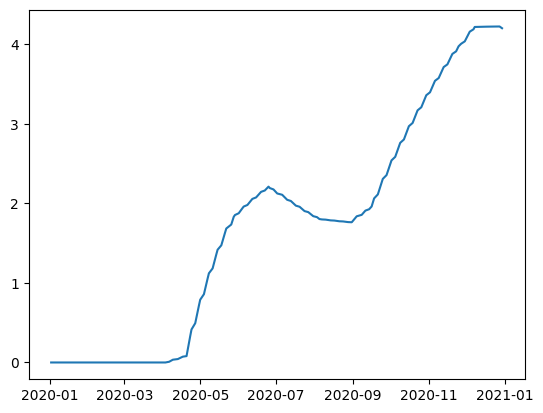

In [12]:
from matplotlib import pyplot as plt


plt.plot(df_return.realized_avg_drawdown)
print(df_return.realized_avg_drawdown[-1])
print(df_return.realized_max_drawdown.mean())

In [14]:

x,y,year = "SPYG_VOOG_2022".split("_")
prices = yf.download([x,y],start=year+"-01-01",end=year+"-12-31")["Adj Close"]
df_signals = pd.read_csv(path_data+"SPYG_VOOG_2022.csv", index_col=0)
df_signals.index = prices.index
df_return = trader.calculate_return(prices,0,df_signals["D = 0.4"],"mispricing_method")


[*********************100%***********************]  2 of 2 completed


In [15]:
df_return.to_csv("SPYG_VOOG_2022_df_return.csv")

In [21]:
pair_infos = ['BZQ_ERY_2017', 'CATH_SPLG_2018', 'HIPS_TPYP_2019', 'LABD_REW_2020', 'CATH_SPLG_2021']
# pair_infos = ['FUTY_VPU_2017', 'VEU_VXUS_2018', 'IVW_VOOG_2019', 'FENY_VDE_2020', 'SPYG_VOOG_2021' ]
# pair_infos = ["BRZU_DUST_2022",]
pair_infos = ["SPYG_VOOG_2022",]
ret_summary = {}
pairs_pnl = pd.DataFrame()
pairs_pnl_all = pd.DataFrame()
strategy = "mispricing_method"
prev_cum_pnl = 0

path_data = "./Baseline Pairs/"
path_output = "./Results 0225 PCA Pairs/"

for pair_info in pair_infos:
    print("-------------------------------------------------")
    print("running", pair_info)
    # try:
    x,y,year = pair_info.split("_")
    year = int(year)
    prices = yf.download([x,y],start=str(year)+"-01-01",end=str(year)+"-12-31")["Adj Close"]

    df_signals = pd.read_csv(path_data+pair_info+".csv", index_col=0)
    df_signals.index = prices.index


    ret_info = {}
    df_return = trader.calculate_return(prices,0,df_signals["D = 0.5"],strategy)
    ret_summary[pair_info+" "+strategy] = trader.get_summary_mispricing(df_return, [x,y],"","","")

    pairs_pnl = df_return[["unrealized_pnl_cum","unrealized_PnL", "realized_pnl_daily", "realized_max_drawdown", "realized_avg_drawdown"]].fillna(0)
    if pairs_pnl.empty :
        pairs_pnl_all = pairs_pnl.copy()
    else: 
        pairs_pnl["unrealized_pnl_cum"] = df_return["unrealized_pnl_cum"] + prev_cum_pnl
        pairs_pnl_all = pairs_pnl_all.append(pairs_pnl)

    prev_cum_pnl = prev_cum_pnl + df_return["unrealized_pnl_cum"][-1]

    # print(df_return["unrealized_pnl_cum"])
    # ret_summary[pair_info] = ret_info
    # except:
    #     print("failed signal generation for",pair_info,"... continue")
    #     pass

# # money_ret_summary = pd.DataFrame.from_dict(ret_summary, orient='index')
# money_ret_summary = pd.DataFrame.from_dict(ret_summary, orient='index')
# # money_ret_summary.columns = df_signals.columns
# money_ret_summary.to_excel(path_output+"result_summary_0.35_1.xlsx")

print("DONE")

print(pairs_pnl_all["unrealized_PnL"].std())
print(pairs_pnl_all["realized_pnl_daily"].std())
print(pairs_pnl_all["realized_max_drawdown"].max())
print(pairs_pnl_all["realized_avg_drawdown"].max())

pairs_pnl_all["unrealized_max_drawdown"] = ((pairs_pnl_all["unrealized_pnl_cum"].cummax() - pairs_pnl_all["unrealized_pnl_cum"])/pairs_pnl_all["unrealized_pnl_cum"].cummax()).fillna(0).replace([np.inf,-np.inf],0)
pairs_pnl_all["unrealized_avg_drawdown"] = pairs_pnl_all['unrealized_max_drawdown'].expanding().mean().fillna(0)  
pairs_pnl_all.to_excel(path_output+"pairs_pnl_1y_2022_0227.xlsx")

-------------------------------------------------
running SPYG_VOOG_2022
[*********************100%***********************]  2 of 2 completed
DONE
0.00034644902695984113
7.087636160904578e-05
0.09424447887275564
0.0003754760114475213


70899218643991.0


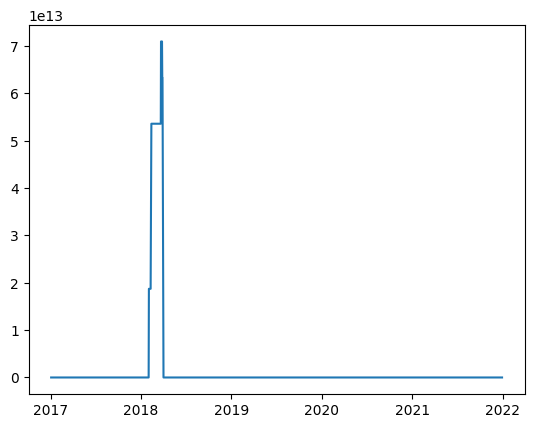

In [18]:
from matplotlib import pyplot as plt

plt.plot(pairs_pnl_all["realized_max_drawdown"])
print(pairs_pnl_all["realized_max_drawdown"].max())

In [5]:
# ML 5yrs
print(pairs_pnl_all["unrealized_PnL"].std())
print(pairs_pnl_all["realized_pnl_daily"].std())
print(pairs_pnl_all["realized_max_drawdown"].max())
print(pairs_pnl_all["realized_avg_drawdown"].max())

pairs_pnl_all["unrealized_max_drawdown"] = ((pairs_pnl_all["unrealized_pnl_cum"].cummax() - pairs_pnl_all["unrealized_pnl_cum"])/pairs_pnl_all["unrealized_pnl_cum"].cummax()).fillna(0).replace([np.inf,-np.inf],0)
pairs_pnl_all["unrealized_avg_drawdown"] = pairs_pnl_all['unrealized_max_drawdown'].expanding().mean().fillna(0)  
pairs_pnl_all.to_excel(path_output+"pairs_pnl_5y_0226.xlsx")

0.043430639598687946
0.02240082971406907
3378761861642383.0
2458319484920201.5


In [7]:
# ML 2022
print(pairs_pnl_all["unrealized_PnL"].std())
print(pairs_pnl_all["realized_pnl_daily"].std())
print(pairs_pnl_all["realized_max_drawdown"].max())
print(pairs_pnl_all["realized_avg_drawdown"].max())

pairs_pnl_all["unrealized_max_drawdown"] = ((pairs_pnl_all["unrealized_pnl_cum"].cummax() - pairs_pnl_all["unrealized_pnl_cum"])/pairs_pnl_all["unrealized_pnl_cum"].cummax()).fillna(0).replace([np.inf,-np.inf],0)
pairs_pnl_all["unrealized_avg_drawdown"] = pairs_pnl_all['unrealized_max_drawdown'].expanding().mean().fillna(0)  
pairs_pnl_all.to_excel(path_output+"pairs_pnl_1y_2022_0226.xlsx")

0.2150048787891291
0.060286248621452904
2.3104809414178606
1.1529016675784147


In [11]:
# PCA 5y
print(pairs_pnl_all["unrealized_PnL"].std())
print(pairs_pnl_all["realized_pnl_daily"].std())
print(pairs_pnl_all["realized_max_drawdown"].max())
print(pairs_pnl_all["realized_avg_drawdown"].max())

pairs_pnl_all["unrealized_max_drawdown"] = ((pairs_pnl_all["unrealized_pnl_cum"].cummax() - pairs_pnl_all["unrealized_pnl_cum"])/pairs_pnl_all["unrealized_pnl_cum"].cummax()).fillna(0).replace([np.inf,-np.inf],0)
pairs_pnl_all["unrealized_avg_drawdown"] = pairs_pnl_all['unrealized_max_drawdown'].expanding().mean().fillna(0)  
pairs_pnl_all.to_excel(path_output+"pairs_pnl_5y_2022_0226.xlsx")

0.0014809567306253958
0.0005105185193885556
1.9779667000594583
0.36441441891309106


-------------------------------------------------
running BRZU_DUST_2022.csv
[*********************100%***********************]  2 of 2 completed


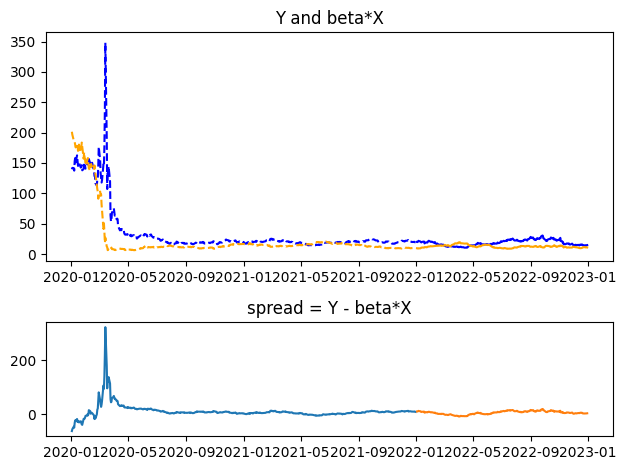

In [15]:
file_names = ["BRZU_DUST_2022.csv",]

for file_name in file_names:
    print("-------------------------------------------------")
    print("running", file_name)
    x,y,year = file_name[:-4].split("_")
    prices = yf.download([x,y],start=str(int(year)-2)+"-01-01",end=year+"-12-31")["Adj Close"].fillna(0)
    trader.plot_pair_and_spread(prices, year+"-01-01")